# Задание 2

Резюме:

На мой взгляд, интересно было бы рассмотреть данные относительно параметров, которые мы можем покрутить, например, мы можем добавить язык, изменить ценовую сетку и сами паки, регулировать акции и бонусы, учитывать локальные особенности для разных стран и т.д. И уже в данном разрезе искать всякие особенности и закономерности.

Наблюдения, особенности и закономерности: 
* Андроид-игра
* Поддерживаемые языки: en, fr, de, ru. 
* Самые играющие страны: США, Германия, Великобритания, Австралия
* Относительно много игроков (из тех для кого нет локализации) из Бразилии (хотя в транзакциях их мало). Добавить португальский?
* Обычные покупки чаще совершаются в пятницу, а акционные, видимо, в дни акций
* Популярность паков обратно пропорциональна их размеру (tiny pack самый востребованный)
* В Германии акционных покупок совершают больше, чем в Британии, но для обычных покупок наоборот. Немецкие особые акции? 
* Доля акционных покупок значительно выше среди тех, кто совершает всего одну покупку, чем у кого уже 2 и более транзакции. И составляет 5.3% от суммарной стоимости паков.
* Основную часть (89% от суммарных продаж паков) приносят люди совершающие более 1 транзакции. Рассмотрим их более подробно, как более-менее постоянных игроков.
* Были найдены дополнительные фичи для постоянных игроков: время между последней и первой транзакциями, и частота, с которой совершались покупки. На основании них были выделены следующие три профиля: 1. игрок, который играет непродолжительное время и часто покупает (видимо, хочет за пару дней прокачаться) 2. игрок, который играет уже долгое время и часто покупает. 3. игрок, который играет уже долгое время и редко покупает.
* Больше всего игроков первого профиля - 795. Второго и третьего - 181 и 107 соответственно.
* По дню недели, по стране и по типу пака сильнее всего отличается 3ий профиль. В сравнении с двумя другими, эти игроки покупают чаще в субботу, а не в пятницу, чаще покупают normal_pack, их доля в Германии чуть больше.
* По среднему чеку и типу покупок выделяется 2ой профиль. Средний чек такого игрока значительно (собственно, это следует из определения профиля) выше других, но главное, что они меньше подвержены влиянию акций (соотношение покупок по акции против обычных)
* Рассмотрим среднее по игроку и среднюю стоимость пака относительно самых крупных стран (в других слишком мало наблюдений): самые активные и расточительные игроки в Британии(можно еще добавить Австралию и Швецию), они покупают чаще и более мелкие паки, Германия, напротив, более пассивна (больше доля 3го профиля игроков). Кроме того в Швеции любят бОльшие по ценности паки. США по всем показателям представляется наиболее усредненой.


Основная задача здесь это максимизировать прибыль. Факторы, влияющие на это могут быть самыми разными: ценовая сетка, локальные особенности, акции. 

Возможные решаемые задачи:
1. Влияние акций на паки на прибыль. Определить, какие группы(профили) игроков более подвержены акциям (например, 1 и 3, а также много новичков).
2. Пересмотр типов паков и их стоимости. Возможно, ли что-то изменить, не испортив все (не выкинуть, например, популярный пак среди одних пользователей, но безынтересный для других)
3. Зависимость от проведения акций от дня недели, времени суток и т.д. 
4. Решение проблем локализации: добавление языка и т.п

Замечания:
* учитывалась только pack_value, поскольку валюта местная.
* кроме резюме лучше еще посмотреть графики и вычисления снизу.
* код не особо соответствует стандартам и без комментов, так как важны графики, таблицы и текст.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
%matplotlib inline

def plot_hist(x, ax):
    ax.barh(range(len(x.keys())), x.values, ecolor='r', align='center')
    ax.set_yticks(range(len(x.keys())))
    ax.set_yticklabels(x.keys())

users = pd.read_csv('users.csv')
transactions = pd.read_csv('trans.csv')
transactions['weekday'] = [calendar.day_name[datetime.datetime.fromtimestamp(t).weekday()] for t in transactions.buytime]

In [2]:
users.head()

,id,regtime(in unixtime),country,device,app_language,user_language
0,23d53fd78182b64d86e2de04f4a991b6,1472510279,TR,samsung SM-T562,en,tr_TR
1,398c2d1b9bfc29e67dac1b9969e660e4,1472526178,US,LGE LGL33L,en,en_US
2,8bef9b79f6f594acf6b714fa52499b3a,1472373420,IT,samsung SM-T310,en,it_IT
3,9f9206ae845ff7d4924118542fd0613d,1472349842,BR,lge LG-P875h,en,pt_BR
4,e630cec3936014821bfe33b0528dddf5,1472177102,CA,samsung SM-G900W8,fr,fr_CA


**Посмотрим, сколько языков поддерживаются в игре, и, соответственно, доли пользователей.**

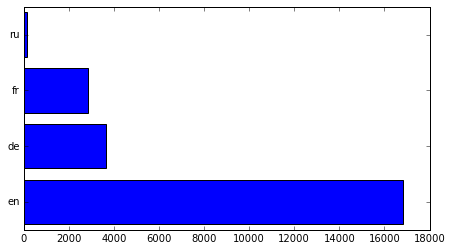

In [3]:
fig = plt.figure(figsize=(16, 4))
lang = fig.add_subplot(121)
plot_hist(users['app_language'].value_counts(), lang)

**Хм, пользователей русскоязычной версии очень мало, видимо она разрабатывалась русскоязычными людьми, но ориентирована на зарубежных юзеров, иначе, зачем тут русский язык.**

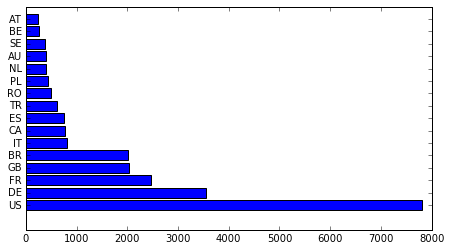

In [4]:
fig = plt.figure(figsize=(16, 4))
lang = fig.add_subplot(121)
plot_hist(users['country'].value_counts(), lang)

**Странно, что при этом в списке стран нет России. Заметим, что топ-3 пользователей соответствует доступным языкам: en, fr, de. Пользователи из Бразилии также сооставляют значительную часть, чуть меньше, чем из Франции, мб добавить португальский язык?**

In [5]:
users['device'].value_counts()[:20]

samsung SM-G920F     526
samsung SM-G900F     453
samsung SM-G925F     317
samsung SM-G935F     275
samsung SM-T550      257
samsung GT-I9505     257
HUAWEI ALE-L21       251
samsung SM-G930F     248
samsung SM-J500FN    218
samsung SM-T530      199
samsung SM-T110      196
samsung GT-P5210     187
LGE LGMS330          170
samsung SM-G531F     159
samsung GT-P5110     145
samsung SM-G903F     143
samsung SM-T113      137
samsung SM-N910F     134
samsung GT-I9300     134
samsung SM-A500FU    127
Name: device, dtype: int64

**Видимо, это игра на Андроид :\**

In [6]:
transactions.head()

,id,payment_type,pack_value,real_value,pack_id,country,currency,buytime,weekday
0,16772979512222886,regular,1120,1599,huge_pack,DE,EUR,1471554290,Friday
1,4730247661974776,regular,100,299,small_pack,AU,AUD,1470628622,Monday
2,58086159972578436,regular,110,199,small_pack,GB,GBP,1470732350,Tuesday
3,37620393033692291,regular,50,99,tiny_pack,NL,EUR,1471300645,Tuesday
4,13487364623308030,regular,240,399,normal_pack,FR,EUR,1470440579,Saturday


In [7]:
transactions_users = pd.merge(transactions, users, how='inner', on='id')
transactions_users.shape

(159, 14)

**Попробовав сджоинить транзакции с пользователями, получаем, что они не особо то и пересекаются, поэтому продолжим рассматривать их по отдельности.**

**Рассмотрим распределения транзакций типов паков, дня недели и страны, разделенные по их типу:**

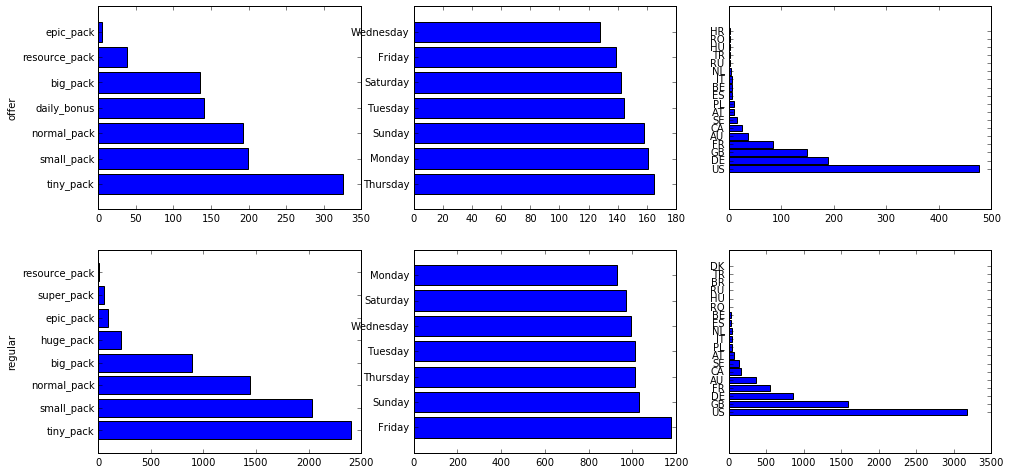

In [8]:
fig = plt.figure(figsize=(16, 8))
op = fig.add_subplot(231)
plot_hist(transactions[transactions['payment_type']=='offer']['pack_id'].value_counts(), op)
op.set_ylabel('offer')
rp = fig.add_subplot(234)
plot_hist(transactions[transactions['payment_type']=='regular']['pack_id'].value_counts(), rp)
rp.set_ylabel('regular')
ow = fig.add_subplot(232)
plot_hist(transactions[transactions['payment_type']=='offer']['weekday'].value_counts(), ow)
rw = fig.add_subplot(235)
plot_hist(transactions[transactions['payment_type']=='regular']['weekday'].value_counts(), rw)
oc = fig.add_subplot(233)
plot_hist(transactions[transactions['payment_type']=='offer']['country'].value_counts(), oc)
rc = fig.add_subplot(236)
plot_hist(transactions[transactions['payment_type']=='regular']['country'].value_counts(), rc)
plt.show()

**Разделим транзакции по пользователям на две группы: транзакции пользователей, у которых больше одной транзакции, и транзакции пользователей, у которых одна транзакция. **

In [9]:
ids = transactions['id'].value_counts()
tr1 = transactions[transactions['id'].isin(ids[ids<=1].keys())]
tr2more = transactions[transactions['id'].isin(ids[ids>1].keys())]

**Срез числа транзакций относительно акционных и обычных покупок в каждой группе.**

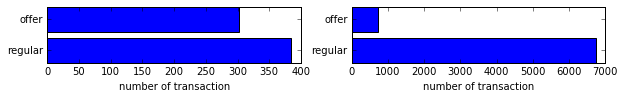

In [10]:
fig = plt.figure(figsize=(10, 1))
op = fig.add_subplot(121)
plot_hist(tr1['payment_type'].value_counts(), op)
op.set_xlabel('number of transaction')
rp = fig.add_subplot(122)
plot_hist(tr2more['payment_type'].value_counts(), rp)
rp.set_xlabel('number of transaction')
plt.show()

**Заметим, пользователей с одной транзакцией значительно меньше и примерно 40% из них акционные. ?Акции влияют на совершение одной покупки, но они не делают пользователя постоянным?**

**Рассмотрим группу с более одной транзакцией более подробно. Для этого введем несколько новых фич: число транзакций на пользователя, время (в днях) между первой и последней транзакциями пользователя, и средний шаг (в днях), с которым он совершает транзакции. **

**Суммарный pack_value этой группы составляет 89% процентов от всей суммы:**

In [11]:
1.0*tr2more['pack_value'].sum()/transactions['pack_value'].sum()

0.8890980227075245

In [12]:
1.0*tr1[tr1['payment_type']=='offer']['pack_value'].sum()/transactions['pack_value'].sum()

0.052745494490757085

In [13]:
def diff(x):
    return (x.max()-x.min())/3600/24.0
tdiff = transactions.groupby(by=['id'])['buytime'].agg([diff, 'count']).reset_index()
tdiff = tdiff[tdiff['diff']!=0]
tdiff['purchase_rate'] = tdiff['diff']/tdiff['count']

**Рассмотрим распределения пользователей по дням между разницей между первой и последней транзакциями. Не удивительно, но чем больше эта разница, тем меньше пользователей. **

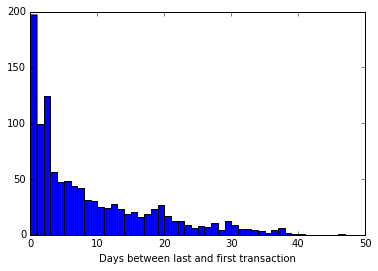

In [14]:
plt.hist(tdiff['diff'], bins=np.array(range(0,50, 1)))
plt.xlabel('Days between last and first transaction')
plt.show()

**Также рассмотрим шаг с которым они совершают покупки:**

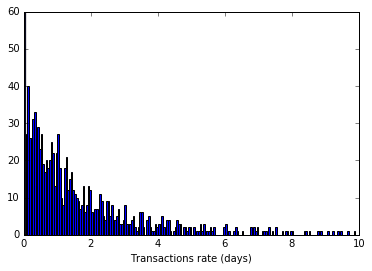

In [15]:
plt.hist(tdiff['purchase_rate'], bins=np.array(range(0,200, 1))/20.0)
plt.xlabel('Transactions rate (days)')
plt.show()

**На основании двух наблюдений сверху попробуем выделить профили игроков, кластеризируя (для оценки используем обычный kmeans) их по шагу и разнице, изначально найдем 2 кластера: покупают часто в короткий срок, покупают реже и дольше играют.**

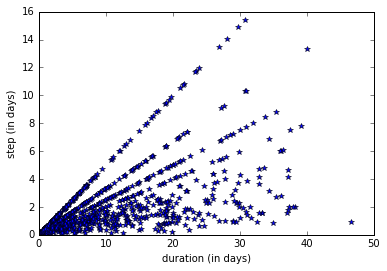

In [16]:
plt.plot(tdiff['diff'],tdiff['purchase_rate'], '*')
plt.ylabel('step (in days)')
plt.xlabel('duration (in days)')

In [17]:
from sklearn.cluster import KMeans
n_clusters = 2
cltr = KMeans(n_clusters)
inds = cltr.fit_predict(tdiff[['diff','purchase_rate']])
cltr.cluster_centers_

array([[  3.90121483,   0.98938978],
       [ 21.52353267,   3.71476986]])

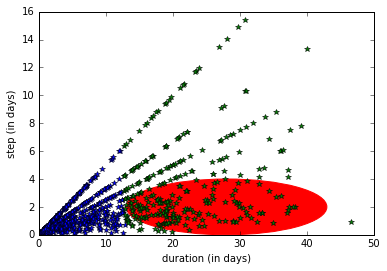

In [18]:
from matplotlib.patches import Ellipse
fig = plt.figure()
ax = fig.add_subplot(111)
c = ['b', 'g']
for i in range(n_clusters):
    ax.plot(tdiff[inds==i]['diff'],tdiff[inds==i]['purchase_rate'], c[i]+'*')
ax.add_artist(Ellipse((28, 2), width=30, height=4, color='r'))
ax.set_ylabel('step (in days)')
ax.set_xlabel('duration (in days)')
plt.show()

**Ок. kmeans тут не оч подходит. Однако он помогает оценить границы кластеров по каждой оси. Красным выделен 3ий профиль, который мы выдумали, чтобы описать игроков которые покупают часто и долго играют (самые выгодные игроки видимо). Симметрично, можно выделить редко покупают и мало играют, но таких относительно мало, поэтому пока не будем.**

In [19]:
c1 = tdiff[tdiff['diff']<13].index
c2 = tdiff[tdiff['diff']>=13][tdiff['purchase_rate']<4].index
c3 = tdiff[tdiff['diff']>=13][tdiff['purchase_rate']>=4].index
tdiff['profile'] = pd.Series([1]*len(c1), index=c1).append(pd.Series([2]*len(c2), index=c2)).append(pd.Series([3]*len(c3), index=c3))
tdiff = pd.merge(transactions, tdiff, how='left', on='id').dropna()

/home/ruslan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/ruslan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


**А теперь посмотрим на распределение транзакций в разных группах по различным параметрам (паки, дни недели, страны)**

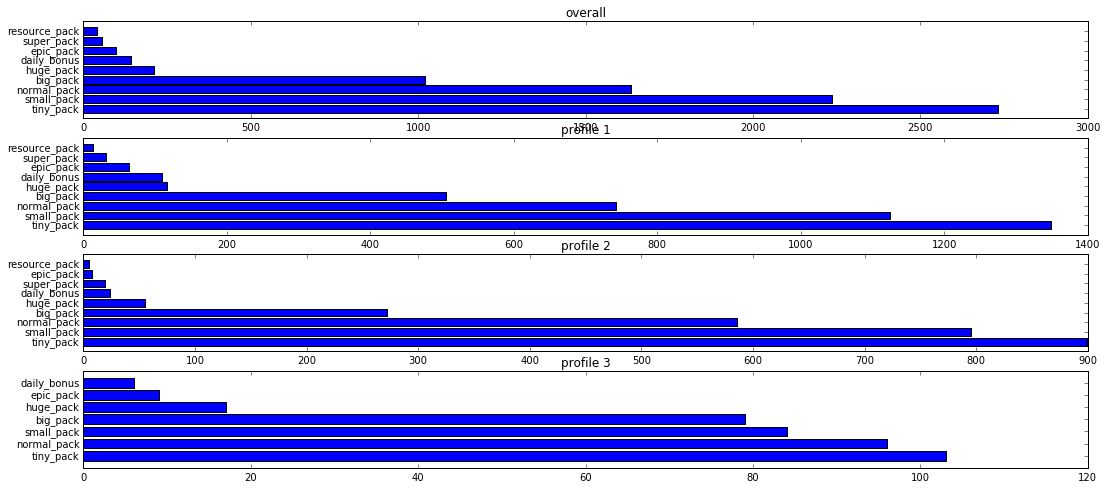

In [20]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(411)
plot_hist(transactions['pack_id'].value_counts(), ax)
ax.set_title('overall')
ax1 = fig.add_subplot(412)
plot_hist(tdiff[tdiff['profile']==1]['pack_id'].value_counts(), ax1)
ax1.set_title('profile 1')
ax2 = fig.add_subplot(413)
plot_hist(tdiff[tdiff['profile']==2]['pack_id'].value_counts(), ax2)
ax2.set_title('profile 2')
ax3 = fig.add_subplot(414)
plot_hist(tdiff[tdiff['profile']==3]['pack_id'].value_counts(), ax3)
ax3.set_title('profile 3')

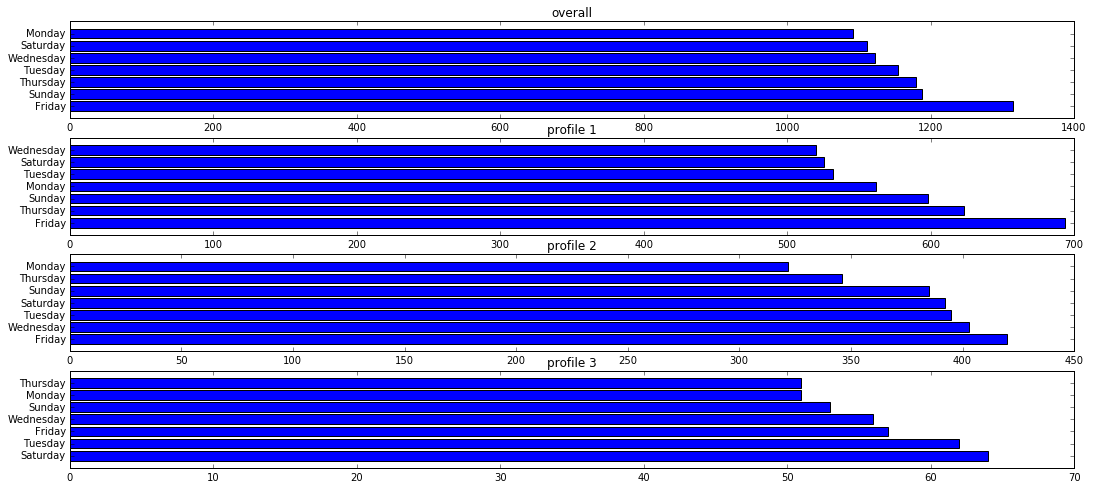

In [21]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(411)
plot_hist(transactions['weekday'].value_counts(), ax)
ax.set_title('overall')
ax1 = fig.add_subplot(412)
plot_hist(tdiff[tdiff['profile']==1]['weekday'].value_counts(), ax1)
ax1.set_title('profile 1')
ax2 = fig.add_subplot(413)
plot_hist(tdiff[tdiff['profile']==2]['weekday'].value_counts(), ax2)
ax2.set_title('profile 2')
ax3 = fig.add_subplot(414)
plot_hist(tdiff[tdiff['profile']==3]['weekday'].value_counts(), ax3)
ax3.set_title('profile 3')

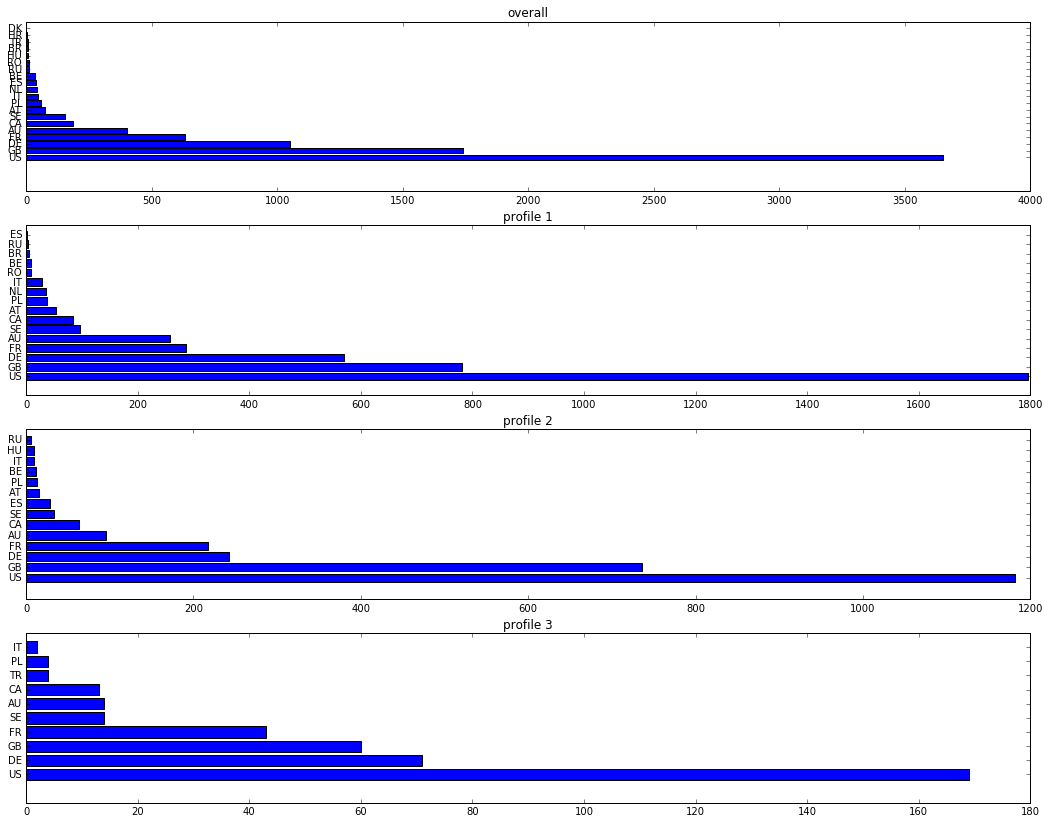

In [22]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(411)
plot_hist(transactions['country'].value_counts(), ax)
ax.set_title('overall')
ax1 = fig.add_subplot(412)
plot_hist(tdiff[tdiff['profile']==1]['country'].value_counts(), ax1)
ax1.set_title('profile 1')
ax2 = fig.add_subplot(413)
plot_hist(tdiff[tdiff['profile']==2]['country'].value_counts(), ax2)
ax2.set_title('profile 2')
ax3 = fig.add_subplot(414)
plot_hist(tdiff[tdiff['profile']==3]['country'].value_counts(), ax3)
ax3.set_title('profile 3')

**Что происходит внутри каждого профиля? Найдем средний чек пользователя (mean_by_player), средний пак (mean_pack_value), отношение акционных и обычных (ratio), размеры кластеров (num_of_users), активность (trans_per_user).**

In [23]:
tdcpro = tdiff[['payment_type', 'profile']]#.drop_duplicates()
def reg_count(x):
    return len(x[x=='regular'])
def off_count(x):
    return len(x[x=='offer'])
tdcpro = tdcpro.groupby(by=['profile'])['payment_type'].agg([reg_count, off_count]).reset_index()
trdiffcp = tdiff.groupby(by=['profile'])['pack_value'].agg(['sum', 'mean', 'count']).reset_index()
trdiffcp.sort_values(by=['sum'], ascending=False, inplace=True)
trdiffcp.rename(columns={'mean': 'mean_pack_value', 'count': 'num_of_trans'}, inplace=True)
trdiffcip = tdiff.groupby(by=['profile', 'id'])['pack_value'].sum().reset_index()
trdiffcip = trdiffcip.groupby(by=['profile'])['pack_value'].agg(['sum', 'count']).reset_index()
trdiffcip['mean_by_player'] = trdiffcip['sum']/trdiffcip['count']
trdiffcip.rename(columns={'sum':'sum_pack_value','count': 'num_of_users'}, inplace=True)
trdiffcip['trans_per_user'] = trdiffcp['num_of_trans']/trdiffcip['num_of_users'] 
trdiffcp.drop(['sum'], axis=1, inplace=True)
tdiff_info = pd.merge(trdiffcp, pd.merge(trdiffcip, tdcpro, how='inner', on='profile'), how='inner', on='profile')
tdiff_info['ratio'] = tdiff_info['reg_count'] / tdiff_info['off_count']
tdiff_info

,profile,mean_pack_value,num_of_trans,sum_pack_value,num_of_users,mean_by_player,trans_per_user,reg_count,off_count,ratio
0,1.0,279.167694,4055,1132025,795,1423.930818,5.100629,3542,513,6.904483
1,2.0,210.791213,2663,561337,181,3101.309392,14.712707,2540,123,20.650407
2,3.0,351.154822,394,138355,107,1293.037383,3.682243,346,48,7.208333


**Что происходит внутри каждой страны? Найдем средний чек пользователя (mean_by_player), средний пак (mean_pack_value), число игроков по принадлежности к профилям (profile_count1, profile_count2, profile_count3), активность (trans_per_user), число игроков (num_of_users).**

In [24]:
tdcpro = tdiff[['id', 'country', 'profile']].drop_duplicates()
def profile_count1(x):
    return len(x[x==1])
def profile_count2(x):
    return len(x[x==2])
def profile_count3(x):
    return len(x[x==3])
tdcpro = tdcpro.groupby(by=['country'])['profile'].agg([profile_count1, profile_count2, profile_count3]).reset_index()
trcp = transactions.groupby(by=['country'])['pack_value'].agg(['sum', 'mean', 'count']).reset_index()
trcp.sort_values(by=['sum'], ascending=False, inplace=True)
trcp.rename(columns={'mean': 'mean_pack_value', 'count': 'num_of_trans'}, inplace=True)
trcip = transactions.groupby(by=['country', 'id'])['pack_value'].sum().reset_index()
trcip = trcip.groupby(by=['country'])['pack_value'].agg(['sum', 'count']).reset_index()
trcip['mean_by_player'] = trcip['sum']/trcip['count']
trcip.rename(columns={'sum':'sum_pack_value','count': 'num_of_users'}, inplace=True)
trcip['trans_per_user'] = trcp['num_of_trans']/trcip['num_of_users'] 
trcp.drop(['sum'], axis=1, inplace=True)
pd.merge(trcp, pd.merge(trcip, tdcpro, how='inner', on='country'), how='inner', on='country')

,country,mean_pack_value,num_of_trans,sum_pack_value,num_of_users,mean_by_player,trans_per_user,profile_count1,profile_count2,profile_count3
0,US,265.446453,3651,969145,894,1084.054810,4.083893,374.0,77.0,50.0
1,GB,230.855830,1741,401920,275,1461.527273,6.330909,113.0,41.0,14.0
2,DE,280.036156,1051,294318,307,958.690554,3.423453,130.0,23.0,20.0
3,FR,283.697785,632,179297,149,1203.335570,4.241611,66.0,17.0,12.0
4,AU,244.925000,400,97970,68,1440.735294,5.882353,29.0,6.0,5.0
5,SE,413.516129,155,64095,31,2067.580645,5.000000,17.0,2.0,2.0
6,CA,288.829787,188,54300,51,1064.705882,3.686275,23.0,6.0,3.0
7,AT,291.064935,77,22412,17,1318.352941,4.529412,9.0,2.0,0.0
8,NL,322.790698,43,13880,13,1067.692308,3.307692,6.0,0.0,0.0
9,PL,184.333333,60,11060,14,790.000000,4.285714,8.0,1.0,1.0


**Некоторые показатели:**

**"Conversion" rate from one-time buyers to multi-time buyers:**

In [45]:
1.0*tr2more['id'].nunique()/transactions['id'].nunique()

0.6332622601279317

Mean active users per day:  91.5490196078


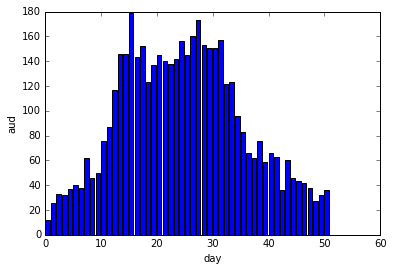

In [54]:
transactions['buyday'] = np.floor((transactions['buytime']-transactions['buytime'].min())/3600/24)
aud = transactions.groupby(by=['buyday'])['id'].nunique()
print "Mean active users per day: ", aud.mean()
plt.bar(aud.keys(), aud.values)
plt.xlabel('day')
plt.ylabel('aud')
plt.show()